In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

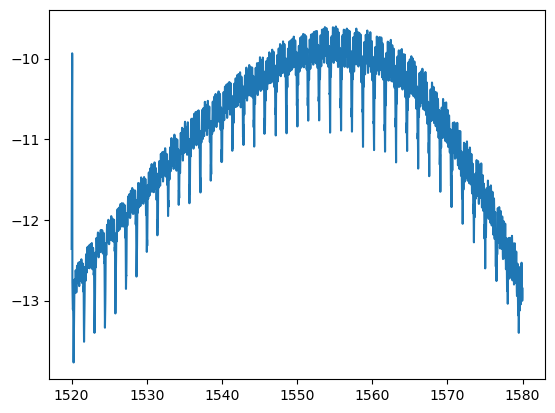

In [2]:
data_analyse_file="sg_rr_68_025 2023-12-11 17-15-27.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

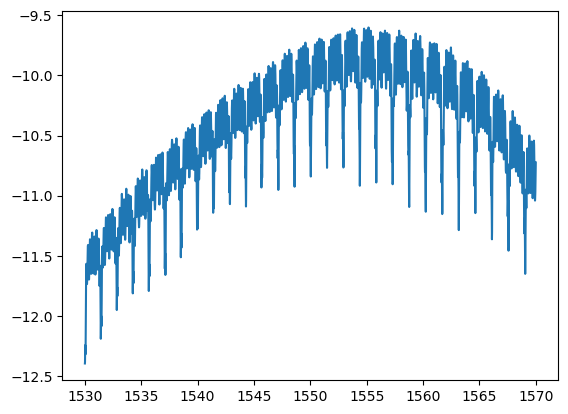

1530.0
1570.0


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

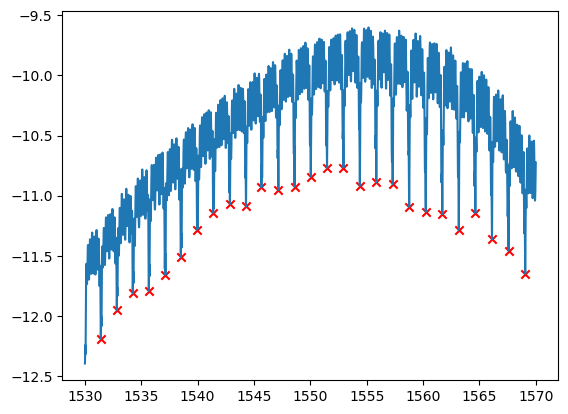

27
[1531.41, 1532.83, 1534.25, 1535.67, 1537.14, 1538.51, 1539.95, 1541.38, 1542.87, 1544.29, 1545.66, 1547.16, 1548.6, 1550.04, 1551.48, 1552.93, 1554.39, 1555.85, 1557.3, 1558.77, 1560.24, 1561.7, 1563.17, 1564.64, 1566.11, 1567.58, 1569.06]


In [4]:
wvlen_step_size=0.01
approx_fsr=1.7
promin_use=0.5
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for sanity check
print(peak_wavelens)#sanity check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[1.42 1.42 1.42 1.47 1.37 1.44 1.43 1.49 1.42 1.37 1.5  1.44 1.44 1.44
 1.45 1.46 1.46 1.45 1.47 1.47 1.46 1.47 1.47 1.47 1.47 1.48]
1.448076923076918
0.006226969401639169


Now to calculate peak widths below:

[0.1236331  0.12316022 0.12795822 0.12356874 0.1276336  0.1302844
 0.13617942 0.13063272 0.12689271 0.12572893 0.13963215 0.12931399
 0.13349326 0.13749214 0.14268227 0.1424154  0.12694022 0.1416703
 0.15165846 0.14569544 0.14773067 0.16097838 0.14139994 0.15588429
 0.14290806 0.15070954 0.14708353]


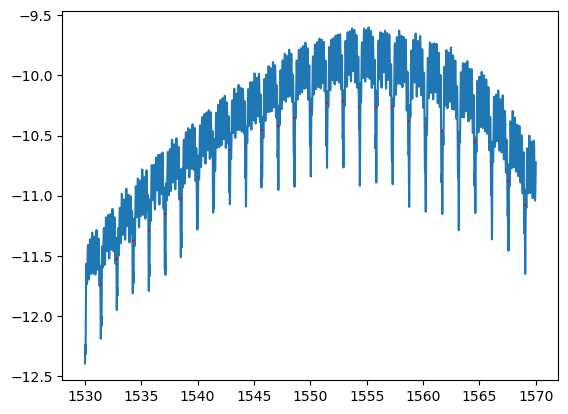

In [6]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [7]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)


0.13753185537626902
0.002057657615840894
